In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# This notebook looks at which variables effect Search Trend

In [111]:
movies_df = pd.read_excel("/home/seetvn/random_projects/ekimetrics/data/formatted/movies_formatted.xlsx")

# Correlation between BoxOffice and Search Trend

### Example

In [110]:

movies_df = movies_df.loc[(movies_df["Year"]==2016),['Title','Search Trend','BoxOffice','Genre']]
print(movies_df, '\n \n')
correlation = movies_df["BoxOffice"].corr(movies_df["Search Trend"])
print(f"Correlation: {correlation}")

                     Title  Search Trend   BoxOffice  \
10       London Has Fallen         856.0  62524260.0   
11              Anthropoid         125.0   2964845.0   
15        God's Not Dead 2         153.0  20774575.0   
40  Mechanic: Resurrection         263.0  21218403.0   
43           Certain Women          28.0   1087585.0   
49        Now You See Me 2        1176.0  65075540.0   

                          Genre  
10             Action, Thriller  
11       Action, Drama, History  
15                        Drama  
40  Action, Adventure, Thriller  
43                        Drama  
49    Action, Adventure, Comedy   
 

Correlation: 0.9638344518593281


### Average correlation coefficient between BoxOffice and SearchTrend from 2009-2021

In [112]:
average_corr = 0
year_counts = movies_df["Year"].value_counts()
valid_years = 0
for year in range(2009,2022):
    # we skip <= 2 because the coefficients could be wrong
    if year_counts[year] > 2:
        valid_years +=1
        temp_df = movies_df.loc[(movies_df["Year"]==year),['Title','Search Trend','BoxOffice']]
        correlation = temp_df["BoxOffice"].corr(temp_df["Search Trend"])
        average_corr += correlation
print(f"Correlation coefficient between BoxOffice revenue and Search Trend is {average_corr/valid_years}")


Correlation coefficient between BoxOffice revenue and Search Trend is 0.1282010876103648


# Average Search Trend of each genre in a given year

### Example

In [137]:
encodings_df_example = pd.read_excel("/home/seetvn/random_projects/ekimetrics/data/formatted/movies_one_hot_encodings.xlsx")
print(encodings_df_example.columns)

Index(['Title', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'imdbRating', 'BoxOffice', 'Search Trend', 'Year', 'PG-13', 'R',
       'Unrated', 'PG', 'G', 'NC-17', 'Approved'],
      dtype='object')


### The year needs to be set to see which genres were popular within that period

In [147]:
# SET YEAR
YEAR = 2017
encodings_df = pd.read_excel("/home/seetvn/random_projects/ekimetrics/data/formatted/movies_one_hot_encodings.xlsx")
encodings_df= encodings_df.loc[(encodings_df["Year"]==YEAR)]

print(encodings_df.loc[:,['Title','Search Trend']])

               Title  Search Trend
6         Girls Trip         421.0
32      Song to Song        4785.0
44          The Post        1644.0
54   Black Butterfly          50.0
61     Power Rangers        1195.0
86          Stronger         491.0
125    I Kill Giants           2.0
132  What the Health        3153.0


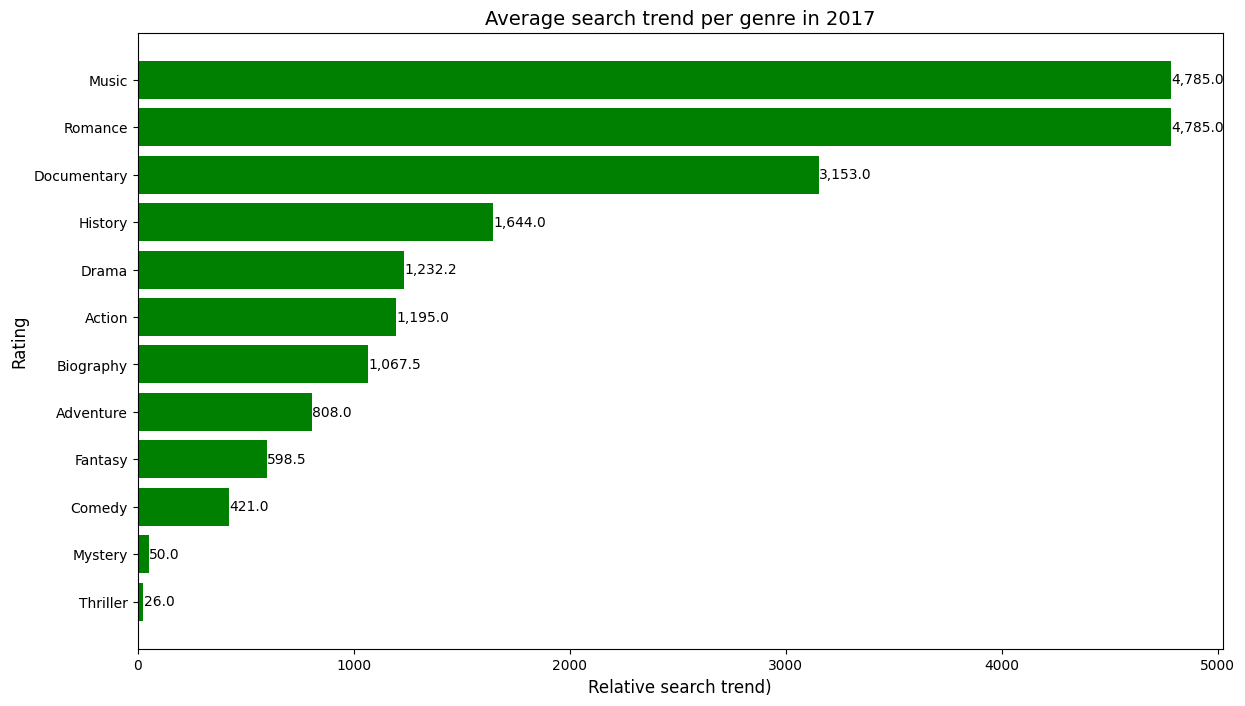

In [ ]:
genre_columns = encodings_df.columns[1:19] 
# Compute average BoxOffice for each rating
average_boxoffice_per_rating = {
    genre: float(encodings_df.loc[encodings_df[genre] == 1, "Search Trend"].mean())
    for genre in genre_columns
}
# Remove keys where value is NaN
average_boxoffice_per_rating = {
    key: value for key, value in average_boxoffice_per_rating.items() 
    if not (isinstance(value, float) and math.isnan(value))
}
sorted_boxoffice = dict(sorted(average_boxoffice_per_rating.items(), key=lambda x: x[1],reverse=True))

x_plot = [key for key, value in sorted_boxoffice.items() if not (isinstance(value, float) and math.isnan(value))]
y_plot = [value for value in sorted_boxoffice.values() if not (isinstance(value, float) and math.isnan(value))]

plt.figure(figsize=(14, 8))
plt.barh(x_plot, y_plot, color="green")

for i, v in enumerate(y_plot):
    plt.text(v + 1, i, f"{v:,.1f}", va="center", fontsize=10, color="black")

plt.xlabel("Relative search trend)", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.title(f"Average search trend per genre in {YEAR}", fontsize=14)
plt.gca().invert_yaxis()